In [1]:
import matplotlib.pyplot as plt
import numpy as np

import methods
import lab2.methods as methods2

In [2]:
from scipy.optimize import approx_fprime
import math

np.random.seed(12)


def generate_points(n, f, rg=1):
    X = rg * np.random.rand(n)
    y = []
    X_err = X + 0.2 * np.random.randn(n)
    for x in X_err:
        y.append(f(x))
    return X, np.asarray(y)


def mse(f, w, X, y):
    diff = 0
    for i in range(0, len(X)):
        diff += (f(w)(X[i]) - y[i]) ** 2
    return diff


def mse_func(f, X, y):
    return lambda w: mse(f, w, X, y)


def grad_calculator(x, func, dim):
    h = 1e-5
    res = []
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)

In [3]:
def grad_func(f, dim):
    return lambda x: grad_calculator(x, f, dim)


def func(p):
    return lambda x: p[0] + p[1] * math.sin(3 * x) / x + p[2] * x


def target_func(x):
    return func([1, 1, 0.1])(x)


n = 10
dim = 3
rg = 10
(X, y) = generate_points(n, target_func, rg)
f = mse_func(func, X, y)
grad = grad_func(f, dim)
hess = lambda x0: approx_fprime(x0, lambda t: approx_fprime(t, f))

lr = lambda x: 1
start = np.zeros(dim)

In [4]:
def make_plot(w1=None, name1=None, w2=None, name2=None, w3=None, name3=None, w4=None, name4=None):
    fig, ax = plt.subplots()
    plt.plot(X, y, 'b.')
    ls = []
    names = []
    t1 = np.arange(0.0, rg + 0.01, 0.1)
    if not w1 is None:
        Y = []
        for x in t1 :
            Y.append(func(w1)(x))
        l1, = plt.plot(t1, Y, '-', color='r', linewidth=1, alpha=0.8)
        ls.append(l1)
        names.append(name1)
    if not w2 is None:
        Y = []
        for x in t1 :
            Y.append(func(w2)(x))
        l2, =plt.plot(t1, Y, '-', color='y', linewidth=1, alpha=0.8)
        ls.append(l2)
        names.append(name2)
    if not w3 is None:
        Y = []
        for x in t1 :
            Y.append(func(w3)(x))
        l3, =plt.plot(t1, Y, '-', color='g', linewidth=1, alpha=0.8)
        ls.append(l3)
        names.append(name3)
    if not w4 is None:
        Y = []
        for x in t1 :
            Y.append(func(w4)(x))
        l4, = plt.plot(t1, Y, '-', color='o', linewidth=1, alpha=0.8)
        ls.append(l4)
        names.append(name4)
    ax.legend(ls, names, loc='upper right', shadow=True)
    plt.xlabel('x')
    plt.ylabel('y')

w: [1.17403465 0.90210989 0.07756704], grad_calc: 32, func_calc: 31
w: [1.17403457 0.90210988 0.07756703], grad_calc: 342, func_calc: 0
w: [1.18066538 0.90236073 0.12712478], grad_calc: 10001, func_calc: 0


C:\Users\awishy\AppData\Local\Temp\ipykernel_11144\1633392719.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return lambda x: p[0] + p[1] * math.sin(3 * x) / x + p[2] * x


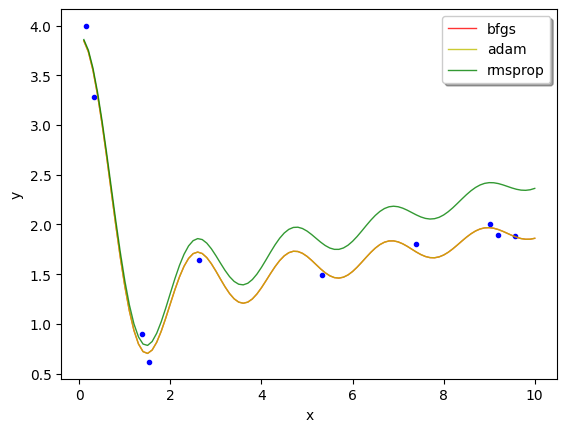

In [5]:
(points1, grad_calc1, func_calc1) = methods.bfgs(f, grad, start)
w1 = points1[-1]
print("w: {}, grad_calc: {}, func_calc: {}".format(w1, grad_calc1, func_calc1))

(points2, grad_calc2, func_calc2) = methods2.sgd_adam(f, grad, start)
w2 = points2[-1]
print("w: {}, grad_calc: {}, func_calc: {}".format(w2, grad_calc2, func_calc2))

(points3, grad_calc3, func_calc3) = methods2.sgd_rmsprop(f, grad, start)
w3 = points3[-1]
print("w: {}, grad_calc: {}, func_calc: {}".format(w3, grad_calc3, func_calc3))

make_plot(w1, "bfgs", w2, "adam", w3, "rmsprop")
# plt.plot(X, y, 'b.')
# t1 = np.arange(0.0, rg + 0.01, 0.1)
# Y = []
# for x in t1 :
#     Y.append(func(w)(x))
# plt.plot(t1, Y, '-', color='r', linewidth=3)
# plt.title('func1')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()